In [2]:
import requests
import bs4
import json
import pandas as pd
import numpy as np
import re


from urllib.parse import urlencode
import sqlite3

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import plotly.express as px
import folium
from folium import plugins
import plotly.express as px
from folium.features import CustomIcon
import matplotlib.pyplot as plt

from IPython.display import HTML, display
import pprint

# Support Local!: Highlighting Select Notable Fast Food and Restaurant Chains in Makati CBD

In [4]:
pp = pprint.PrettyPrinter(indent=4, width=100)


HTML('''
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}


</style>


<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>
''')

<div><span style="background-color: #425564; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold">EXECUTIVE SUMMARY </span></div>

It has been a common dilemma for Filipinos to ask, "Where are we going to eat?" With the COVID-19 pandemic crisis that heavily affected the Restaurant and Food Services Industry, we wanted to focus on Filipino Fast Foood and Restaurant Chains in Makati CBD where we can patronize once the quarantine ends.

This study aims to highlight notable Filipino fast food and restaurant chains in Makati CBD by extracting data from Wikipedia and Google Place API using Python's web scraping tools. A total of 31 restaurants were extracted from Wikipedia's list of Philippine restaurant chains which were passed to the Google Place API. Only those that are within 1,500 meters of the center of Makati are included in the study. A total of 30 restaurants and 185 branches were extracted from the Google Place API.

Exploratory Data Analysis was performed to identify top-rated restaurants, the largest restaurant chains, and sentiments of restaurant's customers. From this, we observed that **restaurants are strategically located** in areas with a lot of foot traffic such as schools, condominiums, and shopping malls. We have identified the **dominance of Jollibee** in the area that can be attributed to how Jollibee is tied to our culture as Filipinos. Lastly, we identified how **highly rated restaurants relate to their customers on an emotional level** by providing delicious food, quality service, and affordable prices.

The insights gained from this study can be used by the Restaurant and Food Services industry to improve their processes that will translate to improved customer experience. It can also be used for business development to identify areas where to put up a branch. Lastly, it can be used by customers to identify which restaurants to go to based on the quality of food, service, and over-all experience they provide.

<div><span style="background-color: #425564; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold">INTRODUCTION</span></div>

Eating good food is ingrained in our culture of Filipinos. Food has become a part of our social lives and that's why eating out together with classmates, friends, colleagues, relatives, and family has become a social norm. In the leading financial and central business district in the Philippines, we may be overwhelmed with the choices of where to eat. Now and then, there is a new fast food or restaurant around the corner.

What are the notable Filipino restaurants in Makati CBD? What do customers say about the restaurants in Makati CBD? In this work, we decided to focus on notable Filipino fast food or restaurant chains that can help the Restaurant and Food Service industry that has been greatly affected by the COVID-19 pandemic crisis.

<div><span style="background-color: #425564; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold">METHODOLOGY</span></div>

To have an overview of the Restaurant and Food Services Industry in Makati CBD, notable Filipino fast food and restaurant chains **(restaurants)** were retrieved from Wikipedia(`https://en.wikipedia.org/wiki/List_of_Philippine_restaurant_chains`). The general workflow shown in Figure 1 involves the following steps:

1. Data Extraction
2. Data Processing
3. Data Storage
4. Exploratory Data Analysis

Each step of the workflow will be discussed in the succeeding sections.

<img src='diagram.png' width=500 height=500 />


**Figure 1. Workflow for clustering the Rappler article**

### 1. Data Extraction

The list of notable Filipino fast food and restaurant chains were extracted from Wikipedia (`https://en.wikipedia.org/wiki/List_of_Philippine_restaurant_chains`) via web scraping tools, specifically Python's `requests` and `BeautifulSoup` modules. Each restaurant branch were extracted using [Google Place API](https://developers.google.com/places/web-service/intro?utm_source=google&utm_medium=cpc&utm_campaign=FY18-Q2-global-demandgen-paidsearchonnetworkhouseads-cs-maps_contactsal_saf&utm_content=text-ad-none-none-DEV_c-CRE_374137922351-ADGP_Hybrid+%7C+AW+SEM+%7C+SKWS+~+Places+%7C+BMM+%7C+Places+API-KWID_43700046143621537-aud-596763661393:kwd-335453537185-userloc_9060947&utm_term=KW_%2Bplaces%20%2Bapi-ST_%2Bplaces+%2Bapi&gclid=CjwKCAjw88v3BRBFEiwApwLevY9mYTKjLUdMXW43imjdZkEvUZPPzmf_XorssA-oiG6xFk9Om4CyeBoC2noQAvD_BwE), specifically `Place Search` and `Place Details`.

### 2. Data Processing
Data preprocessing was implemented on the acquired data. The data processing involves:

- Add a `star_rating` based on `rating`
- Remove restaurants that are not in the scope[\*](#eda)
- Remove text case-sensitivity by converting the `review` to lowercase
- Aggregate by `name` to obtain `count` and `mean rating` per fast food/restaurant chain

[Table 1](#table1) shows the data description:


<a id="table1"></a> 
#### Table 1. Data Dictionary
| Data | Data type | Description |Source|
| ---- | --------- | ------ | ------ |
| `name`          |String| Name of restaurant| Wikipedia |
| `wiki_page`   |String| Wikipedia Page| Wikipedia |
| `count`   |Integer|Number of branches of the restaurant in scope[\*](#eda)| Google Places API |
| `lat`   |Float| Latitude of a branch| Google Places API|
| `lon`    |Float|Longitude of a branch|Google Places API|
| `place_id`   |String|Place ID of a branch|Google Places API|
| `vicinity`    |String    |Vicinity where a branch is located|Google Places API|
| `rating`     |Float|Average rating of users|Google Places API|
| `star_rating`     |Float|Star rating based on `rating`|Google Places API|
| `review`     |String|Review of user|Google Places API|

In [23]:
soup.find_all('div',{'class':'mw-body-content mw-content-ltr'}, 'style', {})

[<div class="mw-body-content mw-content-ltr" dir="ltr" id="mw-content-text" lang="en"><div class="mw-parser-output"><div class="shortdescription nomobile noexcerpt noprint searchaux" style="display:none">Wikipedia list article</div>
 <p>The following is a list of notable fast food and restaurant chains closely associated with or in the <a href="/wiki/Philippines" title="Philippines">Philippines</a>. Some of those listed have multiple branches and are notable enough to appear on Philippine restaurant guides or directories.
 </p><p>Chowking - Turkey (Country), Turkish
 </p>
 <style data-mw-deduplicate="TemplateStyles:r998391716">.mw-parser-output .div-col{margin-top:0.3em;column-width:30em}.mw-parser-output .div-col-small{font-size:90%}.mw-parser-output .div-col-rules{column-rule:1px solid #aaa}.mw-parser-output .div-col dl,.mw-parser-output .div-col ol,.mw-parser-output .div-col ul{margin-top:0}.mw-parser-output .div-col li,.mw-parser-output .div-col dd{page-break-inside:avoid;break-ins

In [26]:
# Wikipedia Scraping
url = 'https://en.wikipedia.org/wiki/List_of_Philippine_restaurant_chains'
response = requests.get(url)
soup = bs4.BeautifulSoup(response.text)
soup.find_all('div', {'class': 'noprint', 'id': 'siteSub'}, )
restaurants = dict()
for elem in soup.find_all('div',
                          {'class':'mw-body-content mw-content-ltr'})[0].select('li'):
    try:
        restaurants.update({elem.text: elem.a['href']})
    except:
        restaurants.update({elem.text: None})

df_restaurants = pd.DataFrame()
df_restaurants = (df_restaurants.from_dict(restaurants, orient='index')
                                .reset_index()
                                .rename(columns={'index': 'name',
                                                 0: 'wiki_page'}))

df_restaurants['name'] = (df_restaurants['name']
                          .apply(lambda x:
                                 re.search(r'[a-zA-Z\' ]+', x)[0]))
df_restaurants['wiki_page'] = (df_restaurants['wiki_page']
                               .str
                               .replace(r'^(#.*)', 'None', regex=True))
df_restaurants['wiki_page'] = (df_restaurants['wiki_page']
                               .str
                               .replace('/wiki/Wikipedia:Citation_needed',
                                        'None'))

url = 'https://en.wikipedia.org'

links = (df_restaurants[(df_restaurants['wiki_page']!='None') &
                        (-df_restaurants['wiki_page'].isnull())]
         ['wiki_page'].to_list())

for link in links[:1]:
    path = url + link
    response = requests.get(path)
    soup = bs4.BeautifulSoup(response.text)

In [33]:
df_restaurants = df_restaurants.iloc[:31]

In [56]:
# # Google Places API

# with open('google_key.txt') as f:
#     api_key = f.read().strip()

# # Get place ID
# lat = 14.5547
# lon = 121.0244
# makati_lat_lon = str(lat) + ' ' + str(lon)

    
# def get_place_id(restaurant, df_googlePlaces, pagetoken=None):
#     """Returns page-token and produces"""
#     response = (requests.get(url +
#                              urlencode({'location': makati_lat_lon,
#                                         'radius': 1500,
#                                         'keyword': restaurant,
#                                         'key': api_key, }) +
#                              "{pagetoken}".format(pagetoken="&pagetoken=" +
#                                                   pagetoken if pagetoken
#                                                   else "")
#                              )
#                 )
#     res = json.loads(response.text)
#     for i in range(len(res['results'])):
#         results = {'name': restaurant,
#                    'place_id':res['results'][i]['place_id'],
#                    'rating': res['results'][i]['rating'],
#                    'vicinity': res['results'][i]['vicinity'],
#                    'lat': res['results'][i]['geometry']['location']['lat'],
#                    'lon': res['results'][i]['geometry']['location']['lng']
#                   }
#         df_googlePlaces = df_googlePlaces.append(results, ignore_index=True)
#     pagetoken = res.get('next_page_token', None)
#     return (pagetoken, df_googlePlaces)

# url = 'https://maps.googleapis.com/maps/api/place/nearbysearch/json?'

# restaurants = df_restaurants['name'].to_list()
# pagetoken = [None, pd.DataFrame()]
# for restaurant in restaurants:
#     while True:
#         pagetoken = get_place_id(restaurant, pagetoken[1], pagetoken[0])
#         import time
#         time.sleep(5)
#         if not pagetoken[0]:
#             break
            

        
# df_googlePlaces = pagetoken[1]

# # Get place description
# url = 'https://maps.googleapis.com/maps/api/place/details/json?'

# def get_place_details():
#     """Returns a `pandas` `DataFrame` that contains comments per rating"""
#     df_googleID = pd.DataFrame()
#     for place in df_googlePlaces['place_id'].to_list():
#         response = (requests.get(url +
#                              urlencode({'placeid': place,
#                                         'key': api_key})
#                                 )
#                    )
        
    
#         results = json.loads(response.text)

    
#         res = results
        
#         if 'reviews' in res['result'].keys():
#             for comment in res['result']['reviews']:
#                 data = {'place_id': place,
#                         'address': res['result']['formatted_address'],
#                         'rating': comment['rating'],
#                         'review': comment['text']}
#                 df_googleID = df_googleID.append(data, ignore_index = True)
#         else:
#             data = {'place_id': place,
#                     'address': res['result']['formatted_address'],
#                     'rating': None,
#                     'review': None}
#             df_googleID = df_googleID.append(data, ignore_index = True)
            
#     return df_googleID

# df_googlePlaceID = get_place_details()

In [57]:
df_places = pagetoken[1]

def stars(x):
    if x == 5:
        return "⭐⭐⭐⭐⭐"
    elif x>=4:
        return "⭐⭐⭐⭐"
    elif x>=3:
        return "⭐⭐⭐"
    elif x>=2:
        return "⭐⭐"
    elif x>=1:
        return "⭐"

df_places['star_rating'] = df_places['rating'].apply(lambda x: stars(x))
df_places['rating'] = df_places['rating'].replace(0, np.nan)

In [58]:
df_reviews = df_googlePlaceID.merge(df_googlePlaces[['name','place_id']])
df_reviews['rating'] = df_reviews['rating'].replace(0, np.nan)
df_reviews['star_rating'] = df_reviews['rating'].apply(lambda x: stars(x))
df_reviews['review'] = df_reviews['review'].str.lower()

In [59]:
agg_googlePlaces = (df_places[['name', 'rating', 'place_id']]
                    .groupby('name')
                    .agg({'rating': 'mean', 'place_id': 'count'})
                    .reset_index(inplace=False)
                    .rename(columns={'place_id': 'count'}))
agg_googlePlaces['star_rating'] = agg_googlePlaces['rating'].apply(
    lambda x: stars(x))
agg_googlePlaces['rating'] = round(agg_googlePlaces['rating'], 2)

df_restaurants = df_restaurants.merge(agg_googlePlaces)

### 3. Data Storage 
The extracted data were stored in a `sqlite` database. A total of 3 tables were stored - `foodchain`, `branch`, and `reviews`. 
- `foodchain` - contains aggregated data of average `rating` and `count` of branches per Fast food/Restaurant chain  
- `branch` - contains `lon`, `lat`, and `rating` per branch
- `reviews` - contains 5 most recent user `review` per branch

Sample processed data are shown in [Table 2](#table2), [Table 3](#table3), and [Table 4](#table4).

<a id="table2"></a> 
#### Table 2. `foodchain` table

In [60]:
shared_path = './data'
file = shared_path+ '/' +'restaurants.db'
conn = sqlite3.connect(file)
# Wikipedia
df_restaurants.to_sql('foodchain', conn, if_exists='replace', index=False)

# Google Places
df_places.to_sql('branch', conn, if_exists='replace', index=False)

# Google Reviews
df_reviews.to_sql('reviews', conn, if_exists='replace', index=False)


In [61]:
pd.read_sql("""SELECT * FROM foodchain""", conn).head(5)

name                     wiki_page  rating  count  \
0  Bacolod Chicken Inasal  /wiki/Bacolod_Chicken_Inasal    3.83     12   
1    Baliwag Lechon Manok                          None    2.25      3   
2           Barrio Fiesta                          None    4.10      3   
3                 Binalot                          None    2.85      7   
4         Brothers Burger                          None     NaN      2   

  star_rating  
0         ⭐⭐⭐  
1          ⭐⭐  
2        ⭐⭐⭐⭐  
3          ⭐⭐  
4        None

<a id="table3"></a> 
#### Table 3. `Branch` table

In [ ]:
pd.read_sql("""SELECT * FROM branch""", conn).head(5)

lat         lon                    name                     place_id  \
0  14.553069  121.019931  Bacolod Chicken Inasal  ChIJg3eT2Q_JlzMRyZD1mbtaPYI   
1  14.550593  121.026377  Bacolod Chicken Inasal  ChIJH8WfGRvJlzMR_Mi8lRx99NI   
2  14.557589  121.022929  Bacolod Chicken Inasal  ChIJ_xCm4wXJlzMRHtlLPsCkK_0   
3  14.550625  121.024847  Bacolod Chicken Inasal  ChIJXza64hrJlzMRAhKq6tlgZKk   
4  14.563017  121.024653  Bacolod Chicken Inasal  ChIJP0aqK6jJlzMROPTr3M51UjE   

   rating                                           vicinity star_rating  
0     2.9          Ayala Life Center, 6811 Ayala Ave, Makati          ⭐⭐  
1     4.8         Level 1, Glorietta 4, Ayala Center, Makati        ⭐⭐⭐⭐  
2     3.6  Level 2, Paseo Center, Paseo de Roxas Avenue, ...         ⭐⭐⭐  
3     4.2         2-016, New Glorietta, Ayala Center, Makati        ⭐⭐⭐⭐  
4     4.2                                140 Jupiter, Makati        ⭐⭐⭐⭐

<a id="table4"></a> 
#### Table 4. `Reviews` table

In [11]:
pd.read_sql("""SELECT * FROM reviews""", conn).head(5)

address  \
0  Ayala Life Center, 6811 Ayala Ave, Makati, Met...   
1  Ayala Life Center, 6811 Ayala Ave, Makati, Met...   
2  Ayala Life Center, 6811 Ayala Ave, Makati, Met...   
3  Ayala Life Center, 6811 Ayala Ave, Makati, Met...   
4  Ayala Life Center, 6811 Ayala Ave, Makati, Met...   

                      place_id  rating  \
0  ChIJg3eT2Q_JlzMRyZD1mbtaPYI     4.0   
1  ChIJg3eT2Q_JlzMRyZD1mbtaPYI     1.0   
2  ChIJg3eT2Q_JlzMRyZD1mbtaPYI     2.0   
3  ChIJg3eT2Q_JlzMRyZD1mbtaPYI     2.0   
4  ChIJg3eT2Q_JlzMRyZD1mbtaPYI     2.0   

                                              review                    name  \
0  the chicken inasal and beef barbecue is really...  Bacolod Chicken Inasal   
1  subpar, bland, underwhelming, and very overpri...  Bacolod Chicken Inasal   
2  small serving, slow service and not so good fo...  Bacolod Chicken Inasal   
3                     slow service, good bbq though.  Bacolod Chicken Inasal   
4                          slooooooooowww service. 😥  Bacolod Chicken Inasal   

  star_rating  
0        ⭐⭐⭐⭐  
1           ⭐  
2          ⭐⭐  
3          ⭐⭐  
4          ⭐⭐

<a id="eda"></a> 
### 4. Exploratory Data Analysis

To have an overview of the different restaurants found in Makati CBD, the restaurants within $1,500$ meters of the center of Makati $(14.5547^\circ N, 121.0244^\circ E)$ were considered. This includes parts of barangay San Lorenzo, Urdaneta, Bel-Air, Poblacion, and San Antonio. [Figure 2](#fig2) shows the center of Makati CBD and the scope of the study. A total of $29$ restaurants with over 185 braches were included in this study. 

<a id="fig2"></a> 

In [ ]:
with open('mapbox_key.txt') as f:
    mapbox = f.read().strip()
lat = 14.5547
lon = 121.0244

scope = folium.Map(location=[lat, lon],
                   zoom_start=14,
                   tiles = 'openstreetmap',
                #    attr='Mapbox attribution',
                   height = 500)
folium.Marker([lat, lon],
              icon_color = 'green').add_to(scope)
folium.Circle([lat, lon],
              radius=2150, #Additional padding due to projection distortion
              fill=True,
              color ='darkgreen').add_to(scope)
scope

#### Figure 2. Map shows the center of Makati CBD with $1,500$ meters radius. Only branches of the notable Filipino fast food and restaurant chains found within the radius are included in the study. 

<div><span style="background-color: #425564; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold">INSIGHTS</span></div>

### A. Restaurants are strategically located.

Most of the restaurants are located strategically in Makati CBD. Aside from the fact that these are located near offices, it can be observed in [Figure 3](#fig3) that these restaurants are concentrated in or within the vicinity of shopping malls, schools, and condominiums/residential area. As expected, these restaurants are found along the street of Ayala Ave., one of the busiest street in Makati CBD. This can help business development teams of these Fast Food or Restaurant chains in identifying optimal location for restaurant branches. 

<a id="fig3"></a> 

In [ ]:
lat = 14.5547
lon = 121.0244
df_plot_1 = pd.read_sql("""SELECT * from branch""", conn)

main = folium.Map(location=[lat, lon],
                  zoom_start=14,
                  tiles = 'openstreetmap',
                #   attr='Mapbox attribution'
                  )
coordinates =[]

lat = df_plot_1['lat']
long = df_plot_1['lon']
for la,lo in zip(lat,long):
    coordinates.append([la,lo])
    
gradient = {.33: 'orange', .65: 'blue', 1: 'lightgreen'}
main.add_child(plugins.HeatMap(coordinates, gradient=gradient))

#### Figure 3. Heat map that shows areas with high-volume of restaurants in Makati CBD.

### B. Jollibee: By a Filipino, For the Filipinos

Before taking on the world, Jollibee's success is attributed on how Filipinos love eating at Jollibee and Jollibee as a brand. [Figure 4](#fig4) shows how it dominates the number of restaurants in Makati CBD, followed by Chowking which is another brand owned by the Jollibee Food Corportation. Indeed, JFC is taking over the Restaurant and Food Services industry.

<sup><i>Hover your mouse on the chart to see the average rating of the branches of the restaurant</i></sup>
<a id="fig4"></a> 

In [ ]:
df_plot_2 = (pd.read_sql("""SELECT * from foodchain ORDER BY count DESC""",
                         conn)
               .head(10)
               .sort_values(by='count'))


fig = px.bar(df_plot_2, y='name', x='count',
             labels={'rating': 'Rating',
                     'star_rating': 'Star Rating',
                     'count': 'Number of Branches'},
             hover_name='name',
             hover_data={'count': True, 'name': False,
                         'rating': True, 'star_rating': True},
             orientation='h',
             height=400, width=800)

fig.update_layout(
    xaxis_title='Number of Branches',
    yaxis_title='Restaurant',
    title={
        'text': 'Largest Restaurants in Makati CBD',
        'y': 0.93,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    hoverlabel=dict(
        bgcolor="white",
        font_size=12
    ))

fig.show()

#### Figure 4. Top 10 Largest Restaurants (in terms of number of branches) in Makati CBD.

### C. Best of the Best:

[Figure 5](#fig5) shows the highly rated restaurants in the area. It's interesting how diverse these restaurants are from fast food chain to up-scale restaurants. It seems that the market is not biased towards a specific type of food or type of restaurant. 

<sup><i>Hover your mouse on the chart to see the average rating of the branches of the restaurant</i></sup>
<a id="fig5"></a> 

In [ ]:
df_plot_3 = (pd.read_sql("""SELECT * from foodchain ORDER BY rating DESC""",
                         conn)
             .head(10)
             .sort_values(by='rating'))


fig = px.bar(df_plot_3, y='name', x='rating',
             hover_data={'name': False, 'rating': True, 'star_rating': True},
             hover_name='name',
             labels={'rating': 'Average Rating',
                     'star_rating': 'Star Rating'},
             orientation='h',
             height=400, width=800)
fig.update_layout(
    xaxis_title='Rating',
    yaxis_title='Restaurant',
    title={
        'text': 'Highly Rated Restaurants in Makati CBD',
        'y': 0.93,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis=dict(
        tickmode='array',
        tickvals=[1, 2, 3, 4, 5],
        ticktext=['⭐', '⭐⭐', '⭐⭐⭐', '⭐⭐⭐⭐', '⭐⭐⭐⭐⭐', ]
    ),
    hoverlabel=dict(
        bgcolor="white",
        font_size=12
    ))

fig.show()

#### Figure 5. Top 10 Highly Rated Restaurants in Makati CBD

### D. Room for Improvement

In [Figure 6](#fig6), we can see how most of the restaurants are rated $4$ with $78$ branches. There's still a lot of improvement needed in terms of over-all quality of food and customer experience.

<sup><i>Hover your mouse on the chart to see the average rating of the branches per star rating</i></sup>
<a id="fig6"></a> 

In [ ]:
df_plot_4 = (pd.read_sql("""SELECT COUNT(name) as count, 
                         ROUND(AVG(rating), 2) as rating,
                         star_rating from branch
                         GROUP BY star_rating""", conn).fillna('No Ratings'))



fig = px.bar(df_plot_4, y='star_rating', x='count',
             hover_data={'rating':True, 'star_rating':False},
             labels={'count':'Number of restaurant branches',
                     'rating':'Average Rating'},
             orientation='h',
             height=400, width=800)
fig.update_layout(
    xaxis_title='Number of Restaurant',
    yaxis_title='Star Rating',
    title={
        'text': 'Number of Restaurant Branches per Star Rating',
        'y':0.93,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
   hoverlabel=dict(
        bgcolor="white", 
        font_size= 13
    ))

fig.show()

#### Figure 6. Number of Restaurant Branch per Star Rating

### E: Pulso ng Masa: What Do Customers Think?

[Figure 7](#fig7) shows the contrast in the sentiment of customers who gave a high rating and a low rating. On one hand, we can observe that high-rated restaurants connect to its customer emotionally. People **love** great food, great place, and great service. But not only that, they appreciate restaurants that are **affordable**. It is prominent that highly rated restaurants puts a premium on their **delicious** menu.

On the other hand, people are concerned about restaurants that seem just **good**. The customer's unsatisfactory experiences can be use to improve restaurants' **quality of food, cleanliness, quality of service, and the price point of their menu**.

<a id="fig7"></a> 

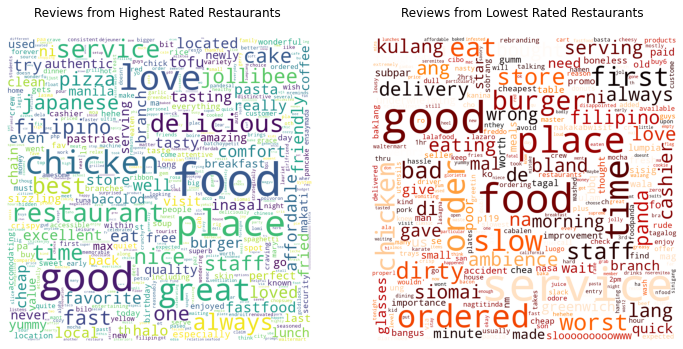

In [ ]:
df_6 = pd.read_sql("""SELECT * from reviews WHERE review IS NOT NULL""", conn)

high = np.percentile(df_6['rating'], 75)
low = np.percentile(df_6['rating'], 25)
df_6_high = df_6[df_6['rating']>=high]
df_6_low = df_6[df_6['rating']<low]

stopwords = list(STOPWORDS)
stopwords = stopwords.append(['the'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 12))
wc_high = WordCloud(background_color="white", max_words=1000,
                    stopwords=stopwords, max_font_size=150,
                    random_state=14,  width=1000, height=1000,
                    collocations=False, colormap='viridis')
wc_high.generate(df_6_high['review'].to_string())
axes[0].imshow(wc_high)
axes[0].axis('off')
axes[0].set_title('Reviews from Highest Rated Restaurants \n')


wc_low = WordCloud(background_color="white", max_words=1000,
                    stopwords=stopwords, max_font_size=150,
                    random_state=14,  width=1000, height=1000,
                    collocations=False, colormap='gist_heat')
wc_low.generate(df_6_low['review'].to_string())
axes[1].imshow(wc_low)
axes[1].axis("off")
axes[1].set_title('Reviews from Lowest Rated Restaurants \n')


plt.show()

#### Figure 7. Word cloud generated from user reviews where high-rated restaurants are defined by `rating`s greater than or equal to the $75^{th}$ percentile (rating  = $5$) while the low-rated restaurants are defined by `rating`s less than the $25^{th}$ percentile (rating  = $3$).

### F. Where are we going to eat?

[Figure 8](#fig8) shows where a specific branch of a restaurant is located. It can be observed that the branches that have a rating of $5$ are mostly found in the vicinitiy of shopping malls.

<sup><i>Tick on the check box to filter restaurants based on `star_rating`. Hover to the icon to see restaurant `name` and `rating`.</i></sup>
<a id="fig8"></a> 

In [ ]:
lat = 14.5547
lon = 121.0244
df_5 = pd.read_sql("""SELECT * from branch""", conn)


df_5['star_rating'] = df_5['rating'].apply(lambda x: stars(x))

main = folium.Map(location=[lat, lon],
                  zoom_start=14,
                  tiles=None)

list_groups = ['⭐⭐⭐⭐⭐', '⭐⭐⭐⭐', '⭐⭐⭐',
               '⭐⭐', '⭐']

for rating in list_groups:
    feature_group = folium.FeatureGroup(rating)
    df_5_2 = df_5.copy()
    df_5_2 = df_5_2[df_5_2['star_rating'] == rating]
    for row in df_5_2.itertuples():

        url = 'icons/{}'.format
        icon_image = url(row.name+'.jpg')

        icon = CustomIcon(
            icon_image,
            icon_size=(28, 28),
            #             icon_anchor=(22, 94),
            popup_anchor=(-3, -3)
        )
        popup_str = f"""<b>{row.name}</b>  <br> Rating: {row.rating}"""
        popup = folium.Tooltip(popup_str)
        folium.Marker(location=[row.lat, row.lon],
                      tooltip=popup,
                      icon=icon).add_to(feature_group)
    feature_group.add_to(main)


folium.TileLayer(tiles='openstreetmap',
    # attr='Mapbox attribution',
    name='Star Rating').add_to(main)
folium.LayerControl(collapsed=False).add_to(main)
main

#### Figure 8. Makati Central Busines District with the restaurants scattered all over the city. 

<div><span style="background-color: #425564; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold">CONCLUSION</span></div>

The Makati CBD has a large number and diverse Filipino restaurants across its vicinity. These are strategically located along the busiest street of Ayala Ave., in the shopping malls, and within the vicinity of schools and residential areas. This shows the love for food of Filipinos and how food has been ingrained in our social culture. Additionally, Jollibee dominates the area with the largest number of branches which reflects not only its growth but also how we patronize Jollibee as Filipinos. There's a lot of highly-rated restaurants in Makati CBD which really coonnected to their customers emotionally. However, there's still a lot of room for improvement which relates to the customers having an average experience or bad experience based on quality of food, service, and price.


<div><span style="background-color: #425564; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold">RECOMMENDATIONS</span></div>

The following points can be considered in future studies related to this work:
- Increase the number of features such as type of food a restaurant serve and price level
- Add more restaurants and increase the scope
- Include external data such as foot traffic and number points of interest (such as residential, hospitals, schools) within a vicinity

<div><span style="background-color: #425564; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold">REFERENCE</span></div>

- https://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/
- https://en.wikipedia.org/wiki/Makati_Central_Business_District